In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set some display options for pandas
pd.set_option('display.max_columns', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [4]:
# Load the dataset
df = pd.read_csv('train.csv')

# --- Initial Inspection ---

# 1. Display the first 5 rows to see the structure
print("--- First 5 Rows ---")
display(df.head())

# 2. Get a concise summary of the dataframe (data types, non-null counts)
print("\n--- Data Info ---")
df.info()

# 3. Get descriptive statistics for numerical columns
print("\n--- Descriptive Statistics ---")
display(df.describe())

--- First 5 Rows ---


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1



--- Data Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB

--- Descriptive Statistics ---


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [6]:
# --- Step 4: Feature Engineering from Datetime ---

# First, let's convert the 'datetime' column to a proper datetime object
df['datetime'] = pd.to_datetime(df['datetime'])

# Now, we can extract useful features into new columns
df['hour'] = df['datetime'].dt.hour
df['day_of_week'] = df['datetime'].dt.dayofweek # Monday=0, Sunday=6
df['month'] = df['datetime'].dt.month
df['year'] = df['datetime'].dt.year

print("Created new time-based features.")


# --- Step 5: Clean Redundant Columns ---

# Drop the original datetime column as we've extracted its info.
# Also drop 'casual' and 'registered' to prevent data leakage.
df.drop(['datetime', 'casual', 'registered'], axis=1, inplace=True)

print("Dropped redundant columns.")


# --- Verify Changes ---
# Display the first 5 rows to see our new dataset
print("\n--- Updated DataFrame Head ---")
display(df.head())

Created new time-based features.
Dropped redundant columns.

--- Updated DataFrame Head ---


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day_of_week,month,year
0,1,0,0,1,9.84,14.395,81,0.0,16,0,5,1,2011
1,1,0,0,1,9.02,13.635,80,0.0,40,1,5,1,2011
2,1,0,0,1,9.02,13.635,80,0.0,32,2,5,1,2011
3,1,0,0,1,9.84,14.395,75,0.0,13,3,5,1,2011
4,1,0,0,1,9.84,14.395,75,0.0,1,4,5,1,2011


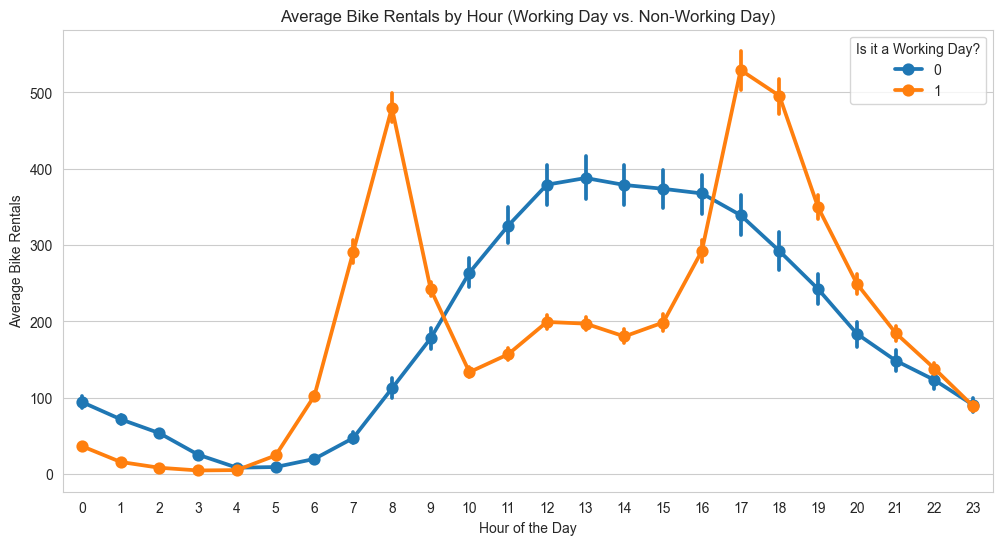

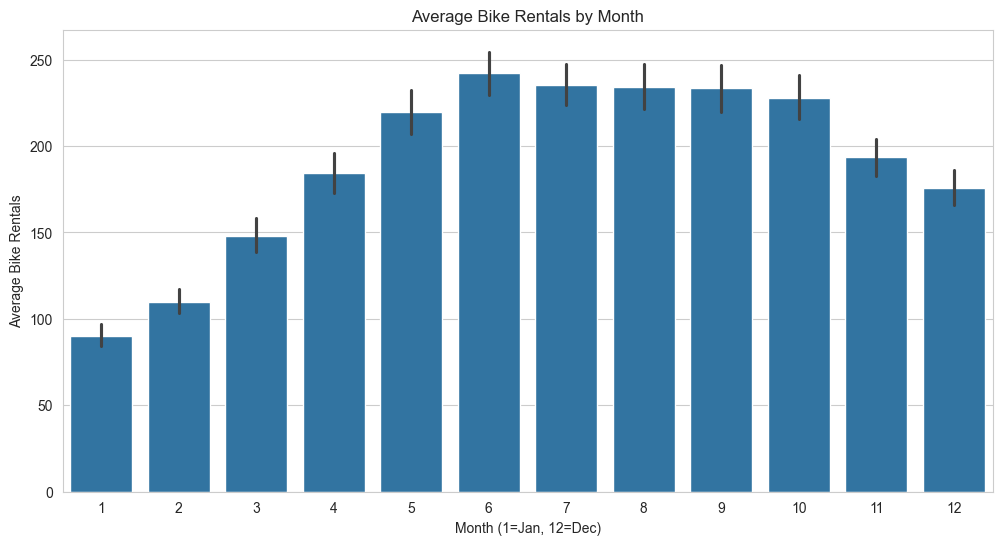

In [8]:
# --- Step 6: Visualize Patterns ---

# Set the style for our plots
sns.set_style('whitegrid')

# 1. Visualize Hourly Demand
plt.figure(figsize=(12, 6))
sns.pointplot(x='hour', y='count', data=df, hue='workingday')
plt.title('Average Bike Rentals by Hour (Working Day vs. Non-Working Day)')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Bike Rentals')
plt.legend(title='Is it a Working Day?')
plt.show()


# 2. Visualize Monthly Demand
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='count', data=df)
plt.title('Average Bike Rentals by Month')
plt.xlabel('Month (1=Jan, 12=Dec)')
plt.ylabel('Average Bike Rentals')
plt.show()

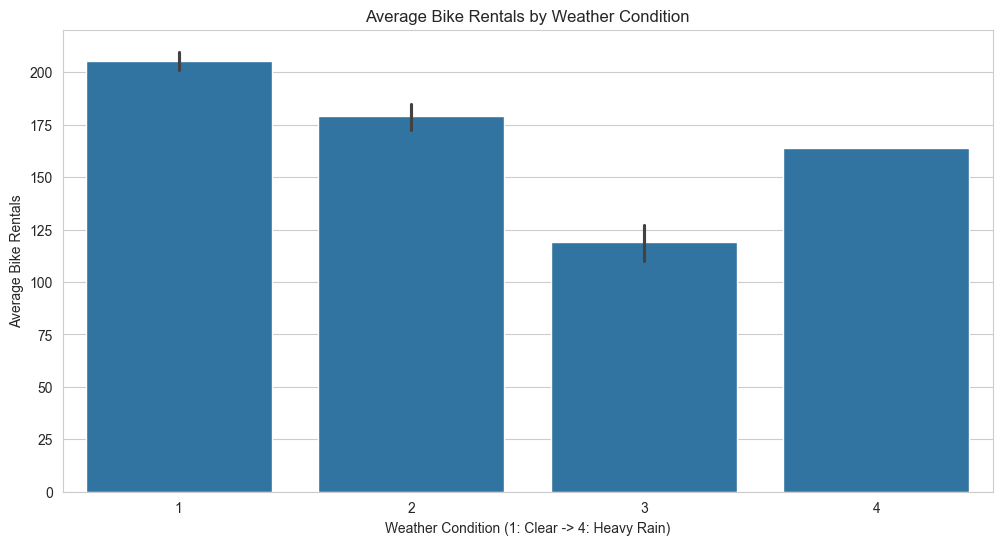

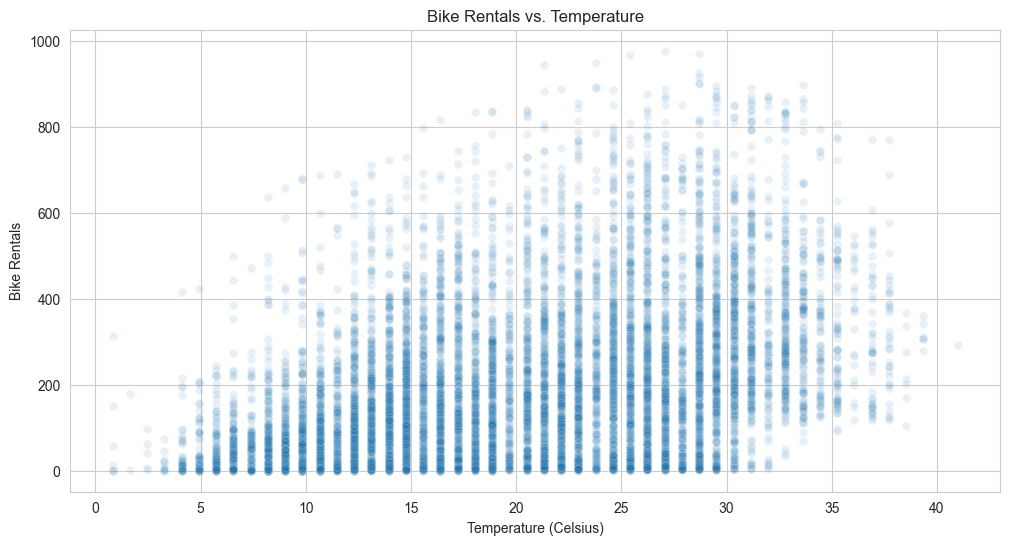

In [10]:
# --- Step 7: Visualize Environmental Factors ---

# 1. Visualize Demand by Weather Condition
plt.figure(figsize=(12, 6))
sns.barplot(x='weather', y='count', data=df)
plt.title('Average Bike Rentals by Weather Condition')
# The dataset description says: 1:Clear, 2:Mist, 3:Light Rain/Snow, 4:Heavy Rain/Snow
plt.xlabel('Weather Condition (1: Clear -> 4: Heavy Rain)')
plt.ylabel('Average Bike Rentals')
plt.show()


# 2. Visualize Demand by Temperature
plt.figure(figsize=(12, 6))
# A scatterplot shows the relationship between two continuous variables
sns.scatterplot(x='temp', y='count', data=df, alpha=0.1) # alpha makes points transparent to show density
plt.title('Bike Rentals vs. Temperature')
plt.xlabel('Temperature (Celsius)')
plt.ylabel('Bike Rentals')
plt.show()

In [12]:
# --- Step 8: Pre-process Data for Modeling ---

# We need to separate our categorical and numerical features
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'hour', 'day_of_week', 'month', 'year']
numerical_features = ['temp', 'atemp', 'humidity', 'windspeed']

# One-Hot Encode the categorical features
# This creates new columns for each category (e.g., season_1, season_2...)
df_processed = pd.get_dummies(df, columns=categorical_features, drop_first=True)

# Scale the numerical features using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_processed[numerical_features] = scaler.fit_transform(df_processed[numerical_features])


print("Data has been scaled and one-hot encoded.")

# --- Verify Final DataFrame ---
print(f"\nNew DataFrame shape: {df_processed.shape}")
print("--- Final Processed DataFrame Head ---")
display(df_processed.head())

Data has been scaled and one-hot encoded.

New DataFrame shape: (10886, 54)
--- Final Processed DataFrame Head ---


,temp,atemp,humidity,windspeed,count,season_2,season_3,season_4,holiday_1,workingday_1,weather_2,weather_3,weather_4,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,day_of_week_1,day_of_week_2,day_of_week_3,day_of_week_4,day_of_week_5,day_of_week_6,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,year_2012
0,0.224490,0.305068,0.81,0.0,16,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.204082,0.288064,0.80,0.0,40,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
2,0.204082,0.288064,0.80,0.0,32,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3,0.224490,0.305068,0.75,0.0,13,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
4,0.224490,0.305068,0.75,0.0,1,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# --- Step 9: Train a Baseline Model (Random Forest) ---

# A: Separate the features (all columns except 'count') from the target ('count')
X = df_processed.drop('count', axis=1)
y = df_processed['count']

# B: Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set has {X_train.shape[0]} samples.")
print(f"Testing set has {X_test.shape[0]} samples.")

# C: Initialize and train the Random Forest Regressor model
# n_jobs=-1 uses all available CPU cores to speed up training
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)

print("\nTraining the Random Forest model... (This may take a moment)")
rf_model.fit(X_train, y_train)
print("Training complete.")

# D: Make predictions on the test set and evaluate the model
predictions = rf_model.predict(X_test)

# Calculate the Root Mean Squared Error (RMSE)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"\nModel Performance on the Test Set:")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")

Training set has 8708 samples.
Testing set has 2178 samples.

Training the Random Forest model... (This may take a moment)
Training complete.

Model Performance on the Test Set:
Root Mean Squared Error (RMSE): 53.6251


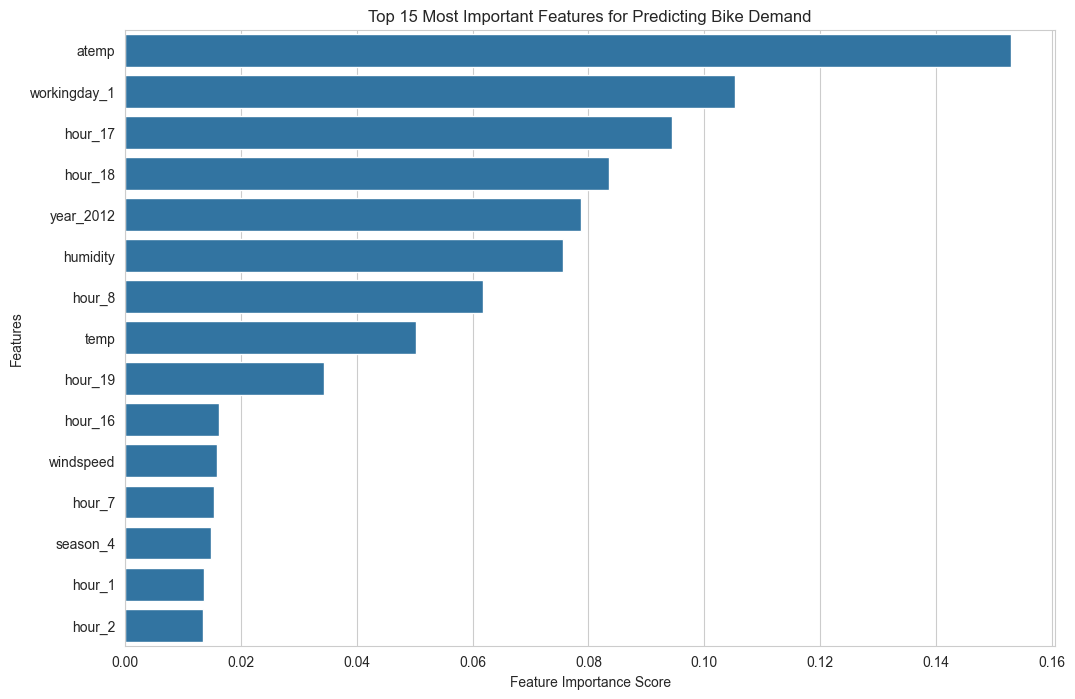

In [16]:
# --- Step 10: Analyze Model Results (Feature Importance) ---

# Create a pandas Series to store feature importances
feature_importances = pd.Series(rf_model.feature_importances_, index=X.columns)

# Sort the features by importance and select the top 15
top_features = feature_importances.sort_values(ascending=False).head(15)

# Plot the top 15 most important features
plt.figure(figsize=(12, 8))
sns.barplot(x=top_features.values, y=top_features.index)
plt.title('Top 15 Most Important Features for Predicting Bike Demand')
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.show()